<a href="https://colab.research.google.com/github/RV05/Miscellaneous-tasks-DL/blob/main/Final_Delamination1_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/d_g - Sheet1.csv')

In [ ]:
dataset.drop(columns=['Thrust_force','Material_removal_rate'],inplace=True)

In [ ]:
dataset.drop(columns='Test',inplace=True)

In [ ]:
numerical_features = ["Spindle_speed",	"Feed_rate"	,"Point_angle"]

In [ ]:
from scipy.stats import zscore
#Train test split
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
X = dataset[numerical_features]

In [ ]:
y = dataset['Delamination']

In [ ]:
X.head()

,Spindle_speed,Feed_rate,Point_angle
0,1200,0.02,100
1,1200,0.06,100
2,1200,0.10,100
3,1200,0.14,100
4,1200,0.18,100


In [ ]:
y.head()

0    1.2986
1    1.3943
2    1.3851
3    1.4258
4    1.4550
Name: Delamination, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(60, 3)
(15, 3)


In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.7135870640657132

In [ ]:
reg.coef_

array([3.33666368e-05, 1.04490515e+00, 1.42294844e-03])

In [ ]:
reg.intercept_

1.0829530581235272

In [ ]:
y_pred_test = reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

MSE_test  = mean_squared_error(10**(y_test), 10**(y_pred_test))
print("MSE_test :" , MSE_test)

RMSE_test = np.sqrt(MSE_test)
print("RMSE_test :" ,RMSE_test)

MSE_test : 21.23893351437484
RMSE_test : 4.608571743433624


In [ ]:
from sklearn.metrics import r2_score
r2_test = r2_score(10**(y_test), 10**(y_pred_test))
print("R2_test :" ,r2_test)
print("Adjusted R2 Test : ",1-(1-r2_score(10**(y_test), 10**(y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2_test : 0.5840507849484422
Adjusted R2 Test :  0.470610089934381


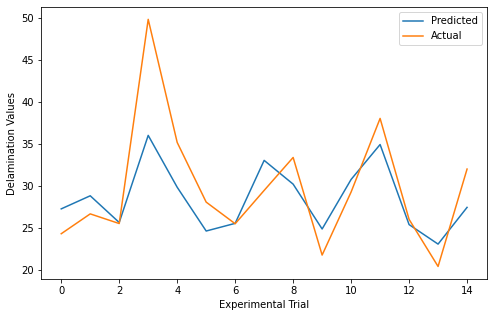

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_test))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.ylabel("Delamination Values")
plt.xlabel("Experimental Trial")
plt.show()

In [ ]:
y_pred_train = reg.predict(X_train)

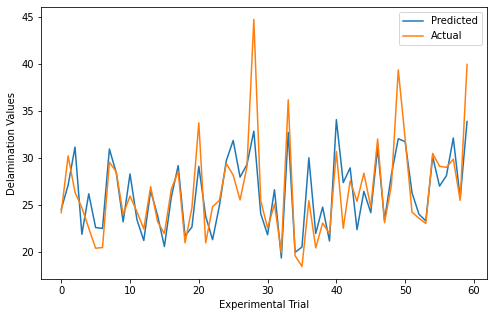

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_train))
plt.plot(np.array(10**(y_train)))
plt.legend(["Predicted","Actual"])
plt.ylabel("Delamination Values")
plt.xlabel("Experimental Trial")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

MSE_train  = mean_squared_error(10**(y_train), 10**(y_pred_train))
print("MSE_train :" , MSE_train)

RMSE_train = np.sqrt(MSE_train)
print("RMSE_train :" ,RMSE_train)

MSE_train : 8.21566283903883
RMSE_train : 2.866297758265674


In [ ]:
from sklearn.metrics import r2_score
r2_train = r2_score(10**(y_train), 10**(y_pred_train))
print("R2_train :" ,r2_train)
print("Adjusted R2 train : ",1-(1-r2_score(10**(y_train), 10**(y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

R2_train : 0.6783081267818487
Adjusted R2 train :  0.6610746335737334


In [ ]:
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores      

array([0.33745539, 0.44694457, 0.76866008, 0.35908883, 0.68631765])

In [ ]:
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-0.00189578, -0.00185883, -0.00265793, -0.00211943, -0.00177537])

In [ ]:
scores = cross_val_score(lm, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
scores

array([-0.04354053, -0.04311419, -0.05155508, -0.04603728, -0.04213508])

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [ ]:
from sklearn.feature_selection import RFE

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 4))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(reg)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003152,0.000568,0.001025,0.000123,1,{'n_features_to_select': 1},0.576064,0.472784,0.543778,0.621846,0.394111,0.521717,0.080180,3,0.560680,0.604794,0.590917,0.577374,0.600190,0.586791,0.016069
1,0.002272,0.000295,0.000963,0.000094,2,{'n_features_to_select': 2},0.659832,0.508849,0.689951,0.518085,0.565385,0.588420,0.073780,2,0.620894,0.674137,0.640470,0.666630,0.649794,0.650385,0.018955
2,0.001576,0.000166,0.000870,0.000057,3,{'n_features_to_select': 3},0.714950,0.639259,0.617458,0.470012,0.629122,0.614160,0.079752,1,0.686147,0.723560,0.719135,0.746275,0.715172,0.718058,0.019258


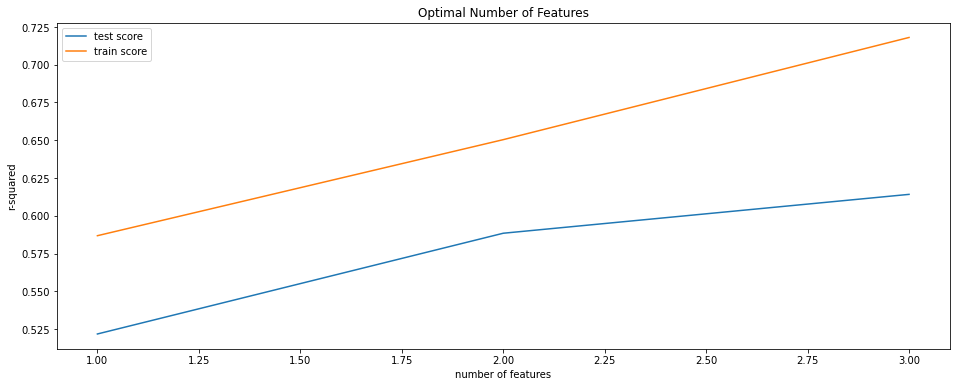

In [ ]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [ ]:
n_features_optimal = 3

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.6424462605216852
